### Accuracy Benchmark

In [1]:
using JLD, Plots, LaTeXStrings

In [2]:
data = JLD.load("../data/pf_error_benchmark.jld")

Dict{String, Any} with 5 entries:
  "LogZ_Projection" => Any[298.51, 581.951, 856.287, 1104.38, 1341.33, 1571.23,…
  "nk_Poisson"      => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.…
  "nk_Borrmann"     => [50.4454, -0.197823, -0.197559, -0.00598876, -0.0059018,…
  "LogZ_Poisson"    => Any[298.51, 581.951, 856.287, 1104.38, 1341.33, 1571.23,…
  "LogZ_Borrmann"   => Any[298.51, 581.962, 885.597, 1193.92, 1502.36, 1810.89,…

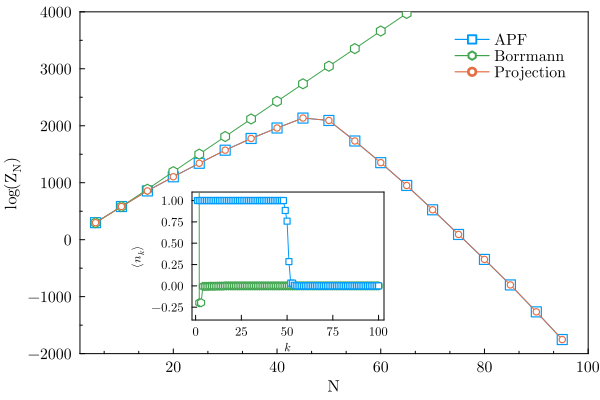

In [3]:
### Plot
cur_colors = get_color_palette(:auto, plot_color(:white))

plt = plot(
    5:5:95, data["LogZ_Poisson"],
    label="APF", lc=cur_colors[1], mc=:white,
    marker=(:square, 5), 
    msw=1.5,
    msc=cur_colors[1],
    xlim=(2,100), ylim=(-2000,4000),
    xminorticks=3, yminorticks=2,
    fontfamily="Computer Modern",
    legendfontsize = 10,
    guidefontsize = 11,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:best,
    foreground_color_legend = nothing
)

plot!(
    plt,
    5:5:95, data["LogZ_Borrmann"],
    label="Borrmann",
    xlabel = L"\mathrm{N}", ylabel=L"\log(\mathrm{Z_N})",
    lc=cur_colors[3], mc=:white,
    marker=(:hexagon, 5), 
    msw=1.5,
    msc=cur_colors[3]
)

plot!(
    plt,
    5:5:95, data["LogZ_Projection"],
    label="Projection", lc=cur_colors[2], mc=:white,
    marker=(:circle, 3.5), 
    msw=1.5,
    msc=cur_colors[2]
)

plot!(
    plt,
    1:100, data["nk_Borrmann"],
    lc=cur_colors[3], mc=:white,
    label="", xlabel=L"k", ylabel=L"\langle n_k \rangle",
    marker=(:hexagon, 4), 
    msw=1.5,
    msc=cur_colors[3],
    ylim=(-0.4,1.1),
    yticks=(collect(-0.25:0.25:1.0)),
    inset=bbox(0.32, 0.48, 0.32, 0.32),
    guidefontsize = 8,
    framestyle=:box, grid=:false,
    subplot=2
)

plot!(
    plt[2],
    1:100, data["nk_Poisson"],
    label="",
    lc=cur_colors[1], mc=:white,
    marker=(:square, 3), 
    msw=1.5,
    msc=cur_colors[1]
)

display(MIME"image/png"(), plt)

In [4]:
savefig("../figures/logZn_error.pdf")
savefig("../figures/logZn_error.svg")

"g:\\My Drive\\JuliaCode\\Plot\\papers-code-CanEnsAFQMC\\figures\\logZn_error.svg"